## ICE-10 Fourier Transform
Please download the following image as the data image used in ICE-10: <br>
https://drive.google.com/file/d/17m26GgRK4VL2DLlGK-0ckCSKyvR8Wlhw/view?usp=sharing

## Tutorial. Reading the following articles to learn Fourier Transform and some applications<br>
https://sparkle-mdm.medium.com/python-computer-vision-tutorials-image-fourier-transform-part-2-ec9803e63993 <br>
https://hicraigchen.medium.com/digital-image-processing-using-fourier-transform-in-python-bcb49424fd82


## Task 1. Apply Fourier transform to the given image and display the frequency domain graph (after shifting).

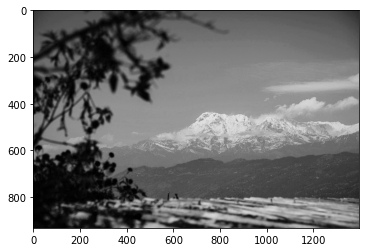

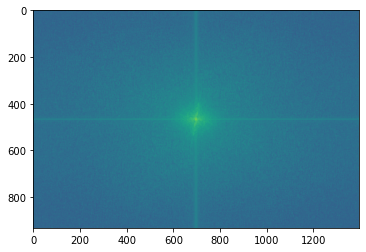

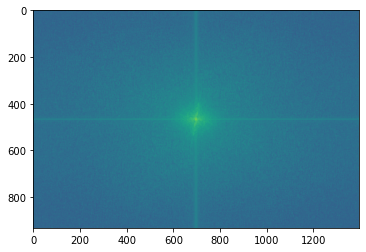

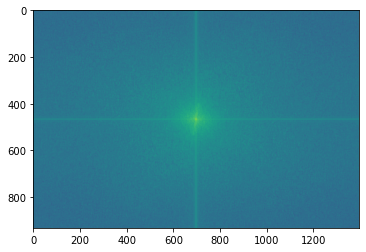

In [1]:
# write your code here
import cv2
import matplotlib.pyplot as plt
import numpy as np


img = cv2.imread(r"\Downloads\Nepal.jpg") # load an image
b,g,r = cv2.split(img)
plt.figure()
plt.imshow(b, cmap='gray')
f = cv2.dft(np.float32(b), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shift = np.fft.fftshift(f)
f_complex = f_shift[:,:,0] + 1j*f_shift[:,:,1]
f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
f_bounded = 20 * np.log(f_abs)
f_img = 255 * f_bounded / np.max(f_bounded)
f_img = f_img.astype(np.uint8)
plt.figure()
plt.imshow(f_img)
f = cv2.dft(np.float32(g), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shift = np.fft.fftshift(f)
f_complex = f_shift[:,:,0] + 1j*f_shift[:,:,1]
f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
f_bounded = 20 * np.log(f_abs)
f_imgg = 255 * f_bounded / np.max(f_bounded)
f_imgg = f_imgg.astype(np.uint8)
plt.figure()
plt.imshow(f_img)
f = cv2.dft(np.float32(r), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shift = np.fft.fftshift(f)
f_complex = f_shift[:,:,0] + 1j*f_shift[:,:,1]
f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
f_bounded = 20 * np.log(f_abs)
f_imgr = 255 * f_bounded / np.max(f_bounded)
f_imgr = f_imgr.astype(np.uint8)
plt.figure()
plt.imshow(f_imgg)


## Task 2.1. Adding some Salt-and-Pepper noises on the given image. Display the frequency domain graph of the noisy image.

<ipython-input-2-a0c6352ae9d7>:8: DeprecationWarning: This function is deprecated. Please call randint(0, 931 + 1) instead
  randX=np.random.random_integers(0,src.shape[0]-1)
<ipython-input-2-a0c6352ae9d7>:9: DeprecationWarning: This function is deprecated. Please call randint(0, 1396 + 1) instead
  randY=np.random.random_integers(0,src.shape[1]-1)
<ipython-input-2-a0c6352ae9d7>:10: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  if np.random.random_integers(0,1)==0:


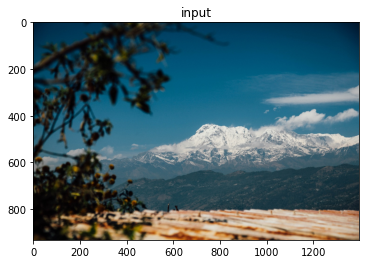

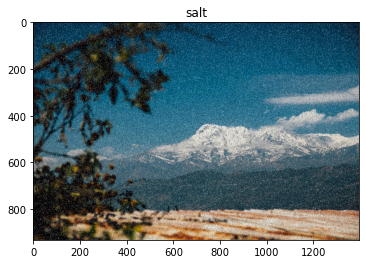

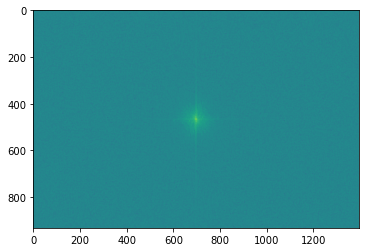

In [2]:
# write your code here
import random
import numpy as np
def SaltAndPepper(src,percetage):
    SP_NoiseImg=src
    SP_NoiseNum=int(percetage*src.shape[0]*src.shape[1])
    for i in range(SP_NoiseNum):
        randX=np.random.random_integers(0,src.shape[0]-1)
        randY=np.random.random_integers(0,src.shape[1]-1)
        if np.random.random_integers(0,1)==0:
            SP_NoiseImg[randX,randY]=0
        else:
            SP_NoiseImg[randX,randY]=255
img=cv2.imread(r"C:\Users\harsh\Downloads\Nepal.jpg")
plt.figure()
plt.title("input")
plt.imshow(img[:,:,::-1])
percetage=0.1
SaltAndPepper(img,percetage)
plt.figure()
plt.title("salt")
plt.imshow(img[:,:,::-1])
imgg = img[:,:,2] # blue channel

f = cv2.dft(np.float32(imgg), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shift = np.fft.fftshift(f)
f_complex = f_shift[:,:,0] + 1j*f_shift[:,:,1]
f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
f_bounded = 20 * np.log(f_abs)
f_img = 255 * f_bounded / np.max(f_bounded)
f_img = f_img.astype(np.uint8)
plt.figure()
plt.imshow(f_img)


## Question 1. Comparing the frequency domain graphs of the original image and the noisy image, what are the difference between them? Please explain.

** Answer to Q1**. type your answer here

The spectrum is small in the noisy image this is because of the noise, frequency is decreased because of this.

---

## Task 2.2. Removing the noises by ideal filter and butterworth filter separately. Display the denoising images.

In [3]:
# write your code here
from math import sqrt
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base
def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base
def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

Text(0.5, 1.0, 'Butterworth High Pass (n=10)')

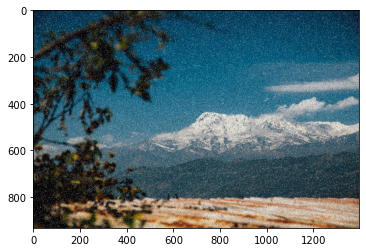

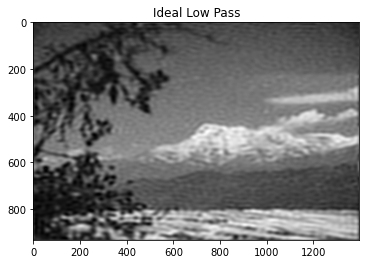

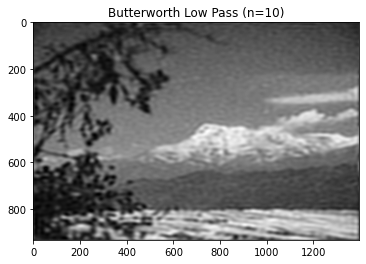

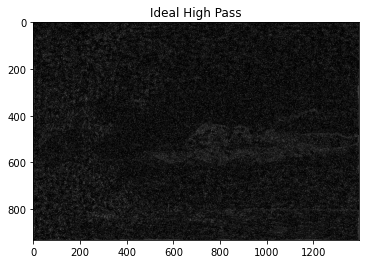

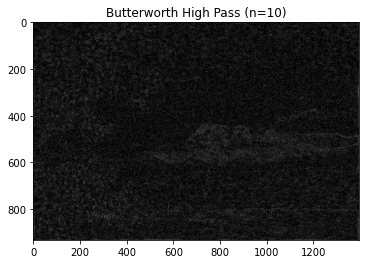

In [4]:
plt.figure()
plt.imshow(img[:,:,::-1])
original = np.fft.fft2(img[:,:,1])
center = np.fft.fftshift(original)

LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.figure()
plt.imshow(np.abs(inverse_LowPass), "gray")
plt.title("Ideal Low Pass")

LowPassCenter = center * butterworthLP(50,img.shape,10)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.figure()
plt.imshow(np.abs(inverse_LowPass), "gray")
plt.title("Butterworth Low Pass (n=10)")


HighPassCenter = center * idealFilterHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.figure()
plt.imshow(np.abs(inverse_HighPass),"gray")
plt.title("Ideal High Pass")

HighPassCenter = center * butterworthHP(50,img.shape,10)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.figure() 
plt.imshow(np.abs(inverse_HighPass), "gray")
plt.title("Butterworth High Pass (n=10)")

## Qjuestion 2. From the outputs of ideal filter in task 2.2, we can see ringing effects appear near the edges. Explain the cause of the ringing effect and how to avoid it.

**Answer to Q2**. type your answer here


Low pass filters remove high frequencies making them noisy and resulting in the ripple effect as seen in the above images. 
We can remove this by passing the image through window sinc function.
Also gaussian filter doesn't have this ripple noise in images.

---